In [1]:
from src.data_preprocessing import *

df = load_data('../data/jobfair_train.csv')

columns_to_normalize = [
    'morale_boosters_stash', 'rests_stash', 'tokens_stash', 'tokens_spent_last_28_days',
    'avg_training_factor_top_11_players', 'avg_age_top_11_players',
    'league_match_watched_count_last_28_days'
    'avg_stars_top_14_players', 'days_active_last_28_days', 'session_count_last_28_days',
    'playtime_last_28_days', 'league_match_won_count_last_28_days', 'training_count_last_28_days',
    'avg_stars_top_11_players'
    ]

columns_to_drop = [
    'morale_boosters_stash', 'rests_stash', 'tokens_stash', 'tokens_spent_last_28_days',
    'avg_training_factor_top_11_players', 'avg_age_top_11_players',
    'league_match_watched_count_last_28_days', 'global_competition_level',
    'avg_stars_top_14_players', 'days_active_last_28_days', 'session_count_last_28_days',
    'playtime_last_28_days', 'league_match_won_count_last_28_days', 'training_count_last_28_days',
    'avg_stars_top_11_players', 'global_competition_level', 'club_id','cohort_season','season','dynamic_payment_segment', 'registration_country', 'registration_platform_specific'
]

df = preprocess_data(df, columns_to_normalize, columns_to_drop)

In [2]:
from sklearn.model_selection import train_test_split
from src.models import *
from src.utils import *

x, y = df.drop(columns=['league_rank', 'league_id']), df['league_rank']
pca_model, principal_components = getPcaModel(df, n_components=9, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(principal_components, y, test_size=0.2, random_state=42)
model_rf = getRandomForestModel(X_train, y_train)

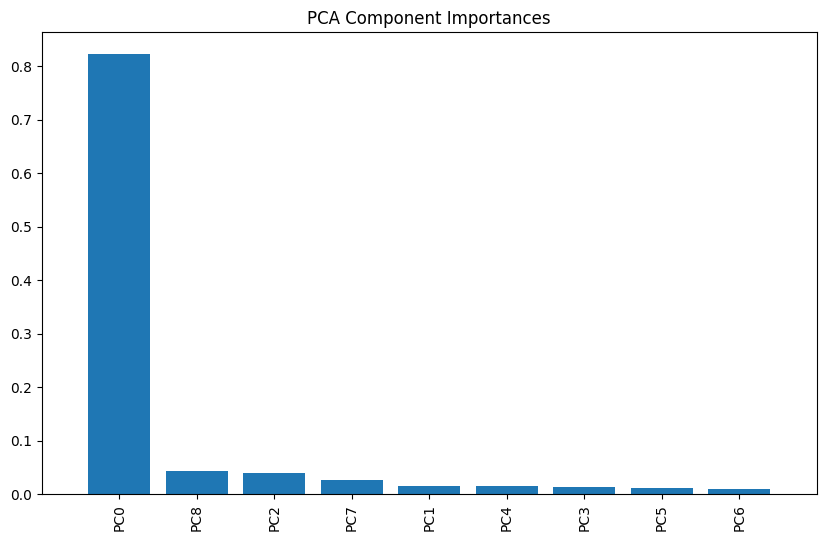

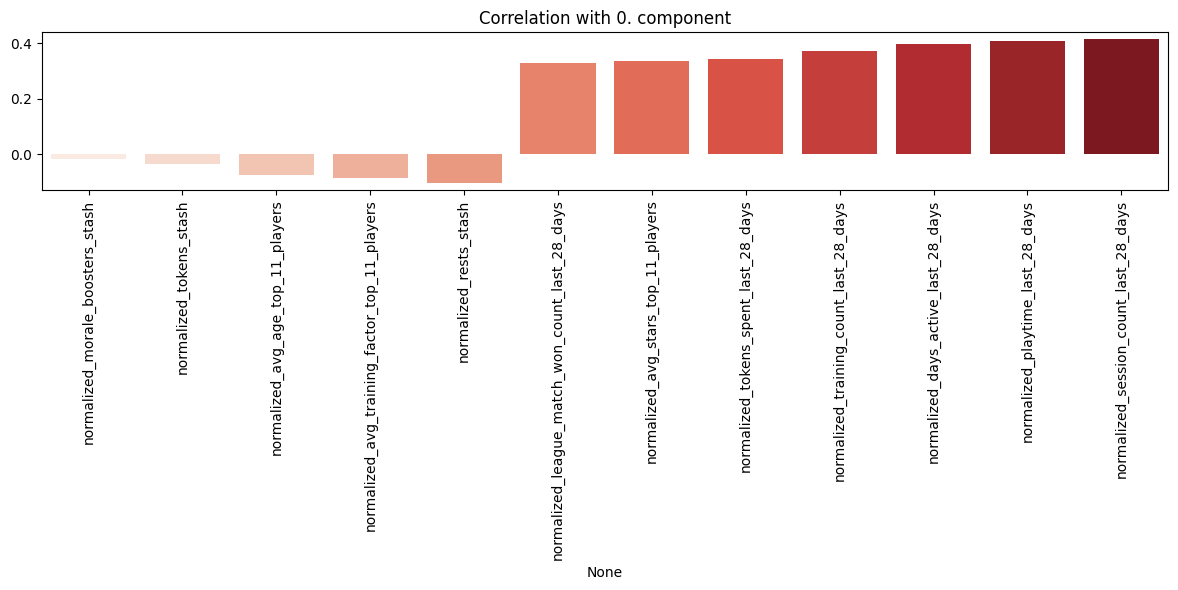

In [3]:
getFeatureImportancesPca(model_rf)
plot_pc_loading(pca_model, 0, x.columns)
